<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%EC%9D%98_%EC%9D%B4%ED%95%B4(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 감성분석의 이해

* 감성분석(Sentiment Analysis)은 텍스트에 포함된 단어들을 통해 긍정, 중립, 부정 등 텍스트에 어떠한 감정이 담겨 있는지 파악하는 분석방법
* 감성분석은 다른 말로 오피니언 마이닝(opinion mining)이라고도 불림

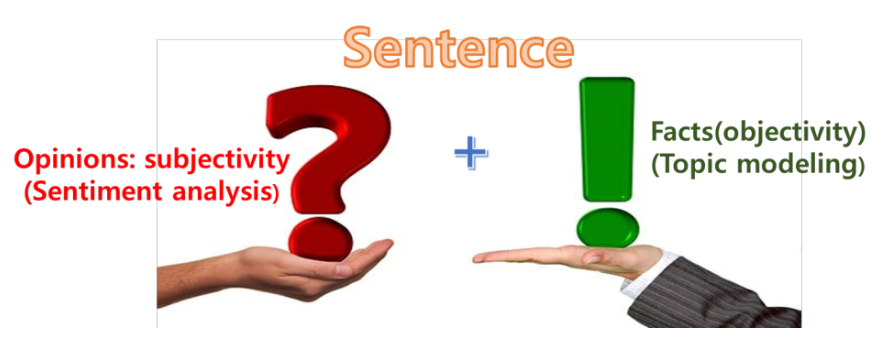

##### 감성분석(Sentiment Analysis) 방법

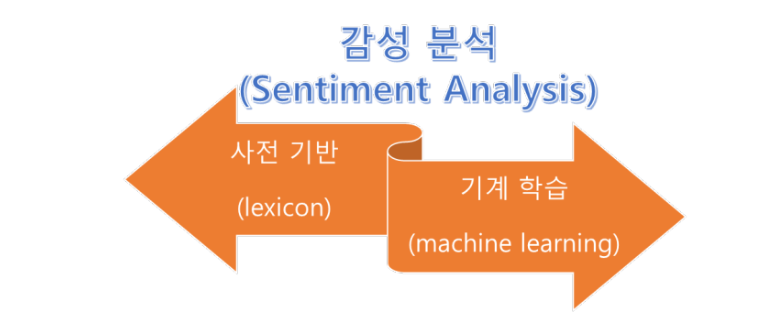

#### 감성 사전(lexicon) 기반 감성 분석: 비지도 학습



* 감성 사전 기반 감성분석은 텍스트에서 단어를 추출한 후 추출된 단어와 감성 사전에 있는 단어를 매칭 시켜서 감성 수치를 계산하는 방식


* “Tim is a great guy"
* => [“Tim”, “is”, “a”, “great”, “guy”]로 토큰 화(tokenization)
* => 분석에 불필요한 불용어(stopwords)를 제거하면
*  [“Tim”, “great”, “guy”]가 최종 분석 말뭉치(corpus)가 됨

* 각각의 단어들은 사전에 등록되어 있는 감성 단어와 매치해서 다음과 같이 분류\
- ‘Tim’: 중립
- ‘great’: 긍정
- ‘guy’: 중립

이 문장의 감성은 긍정적이라고 판단



## 영어 감성사전

#### TextBlob lexicon

* TextBlob은 파이썬 라이브러리이며 메서드에 액세스하고 기본적인 자연어처리(NLP) 작업을 수행할 수 있는 간단한 API를 제공

* TextBlob의 감성 함수는 극성(polarity)과 주관성(subjectivity)이라는 두 가지 속성을 반환

* 극성은 [-1, 1] 범위 값을 제공. 여기서 1은 양의 긍정을 의미하고 -1은 음의 부정을 의미

* 주관적인 문장은 일반적으로 개인의 의견, 감정 또는 판단이고, 객관적인 문장은 사실적인 정보를 의미. 주관성은 또한 [0, 1]의 범위 값을 제공

* 파이썬에서는 TextBlob를 호출해서 문장을 TextBlob으로 자연어 처리한 후 sentiment를 메서드를 사용해 감성어 분석을 수행

​

In [11]:
import nltk                         # 자연어처리 패키지 nltk 불러오기
nltk.download('punkt')              # 구두점으로 분리할 문장 토큰나이저 다운로드
from textblob import TextBlob       # TextBolb 호출
from textblob import TextBlob

text = "I really love you. I like you. I don't want you. I hate you. I am a boy."
blob = TextBlob(text)

for sentence in blob.sentences:
  print("극성:", sentence.sentiment.polarity, "주관성:", 
        sentence.sentiment.subjectivity, sentence)


극성: 0.5 주관성: 0.6 I really love you.
극성: 0.0 주관성: 0.0 I like you.
극성: 0.0 주관성: 0.0 I don't want you.
극성: -0.8 주관성: 0.9 I hate you.
극성: 0.0 주관성: 0.0 I am a boy.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### AFINN lexicon



* AFINN 감성사전은 감성분석에 가장 단순하면서도 대중적으로 사용되는 감성어 사전
* AFINN 감성사전은 AFINN-11 버전을 Github에 올려놓고 afinn 라이브러리를 제작하여 공개
* Finn Arup Nielsen이 개발하고 수정하였으며, 3300개 이상의 단어가 포함되어 있고 감성 어휘들에 대해 –5 ~ +5의 점수를 부여
* 파이썬에서 Afinn을 바로 호출(from afinn import AFinn)해서 사용

In [12]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=d4764209478c8de073870fcf1b75e3e4c4bb3bbf46161477b6694db0a358b377
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [22]:
# Afinn 불러오기


from afinn import Afinn
import pandas as pd
 
#instantiate afinn
afn = Afinn()
 
lists = ["I really love you.", "I like you.", "I don't want you.",  "I hate you.", "I am a boy."]
          
# 극성값을 구하고 라벨링하기
scores = [afn.score(list) for list in lists]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]

# 데이터프레임으로 만듦
df = pd.DataFrame()
df['topic'] = lists
df['scores'] = scores
df['sentiments'] = sentiment
print(df)


                topic  scores sentiments
0  I really love you.     3.0   positive
1         I like you.     2.0   positive
2   I don't want you.     1.0   positive
3         I hate you.    -3.0   negative
4         I am a boy.     0.0    neutral


####  SentiWordNet

* WordNet은 프린스턴 대학교에서 구축한 유의어 D로 영어를 분석할 때 가장 대중적인 말뭉치 중 하나
* WordNet은 자연어처리와 의미론 분석(semantic analysis)에 많이 활용되고, SentiWordNet 감성사전은 감성분석에 사용
* SentiWordNet은 WordNet의 DB에서 감성분석에 필요한 긍정, 중립, 부정의 척도를 제공
* 감성 점수는 긍정(Pos)+부정(Neg)+중립(Obj) = 1의 값을 갖기 때문에 긍정, 부정, 중립 모두 0~1의 값
*  SentiWordNet 감성 사전을 살펴보면, ‘unable’의 경우 긍정(0), 부정(0.75), 중립(0.25)로 구성되어 있다. 

​

#### VADER

* VADER(Valence Aware Dictionary and sEntiment Reasoner)는 C.J. Hutto에 의해 개발되었으며, 규칙 기반(rule-based)에 의해 감성분석을 수행
*특히 SNS 등 소셜 미디어 분석에 특화
* nltk 라이브러리에서 nltk.sentiment.vader 모듈을 사용
* VADER 모듈은 현재 7,500개의 정제된 단어로 구성되어 있으며, 4가지 극성값을 제공, –4(강한 부정)에서 +4(강한 긍정)까지 등급이 매겨져있고, 0은 중립(또는 없음) 
*그리고 네 번째 극성값인 compound는 이 세 값을 조합해 -1에서 +1 사이의 값을 제공

In [23]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

lists = ["I really love you.", "I like you.", "I don't want you.",  "I hate you.", "I am a boy."]
scores = [sia.polarity_scores(list) for list in lists]

df = pd.DataFrame(scores)   # scores가 4가지(neg, neu, pos, compound) 극성을 키로 갖는 딕셔너리 데이터
df['topic'] = lists
print(df)

     neg    neu    pos  compound               topic
0  0.000  0.308  0.692    0.6697  I really love you.
1  0.000  0.286  0.714    0.3612         I like you.
2  0.379  0.621  0.000   -0.0572   I don't want you.
3  0.787  0.213  0.000   -0.5719         I hate you.
4  0.000  1.000  0.000    0.0000         I am a boy.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## 한국어 감성사전

#### KOSAC(한국어감성분석코포스)

* KOSAC(한국어감성분석코포스) 감성사전은 [http://word.snu.ac.kr/kosac/data/lexicon.zip] 에서 다운로드

* KOSAC 감성 사전은 서울대학교에서 개발한 한글의 말뭉치 사전이며 세종 구문 분석 코퍼스로부터 선별한 332개의 기사, 7,744개 문장을 주석 대상으로 17,582개의 감정 표현이 수록되어 있음

#### KNU 한국어 감성 사전


* KNU 한국어 감성 사전은 군산대학교에서 구축한 한국어 감성사전으로 국립국어원에서 제공하는 ‘표준국어 대사전(국립국어원 2018)’을 구성하는 모든 단어와 그 단어에 해당하는 뜻풀이를 수집한 후 정제하여 만들었으며 그 외에도 축약어, 이모티콘 등 표준국어 대사전에서 추출되지 않은 새로운 감성어를 추출
* KNU 감성 사전은 영화, 드라마, 음악, 스마트폰, 컴퓨터 등 특정 도메인에서 사용되는 긍부정어보다는 인간의 보편적인 기본 감정 표현을 나태내는 긍정과 부정어로 구성

* https://github.com/park1200656/KnuSentiLex

## 기계학습(machine learning) 기반 감성분석: 지도학습



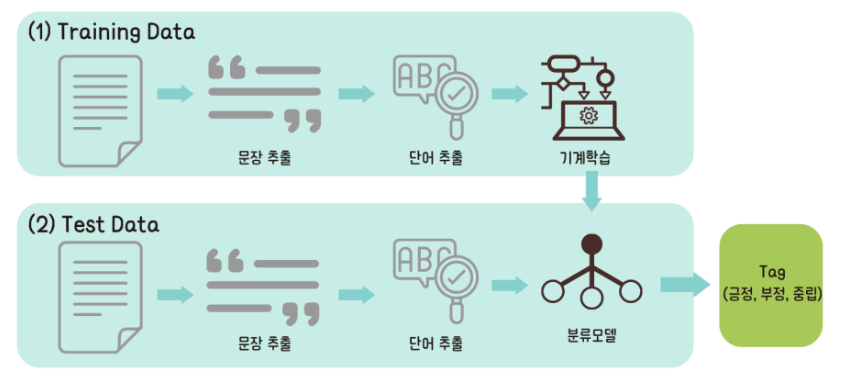

* Naive Bayes, regression, Support Vector Machines(SVM)